# **Sistemas Numéricos**

## 1 - Conversões de bases

### 1.1 - Decimal <-> Binário

In [10]:
def decimal_binario(decimal):
    if decimal == 0:
        return '0b0'

    b = ''

    while decimal > 0:
        b = str(decimal%2) + b
        decimal //= 2

    return  '0b' + b

def binario_decimal(binario):
    if binario.startswith('0b'):
        n = binario[2::]
    else:
        n = binario

    d = 0

    for i,b in enumerate(n[::-1]):
        if b == '1':
            d += 2**i

    return d

Resultados

In [15]:
print(decimal_binario(23))
print(binario_decimal('0b10111'))

0b10111
23


### 1.2 - Decimal <-> Hexadecimal

In [13]:
def decimal_hexa(decimal):
    if decimal == 0:
        return '0x0'

    algarismos = '0123456789ABCDEF'
    h = ''

    while decimal > 0:
        h = algarismos[decimal%16] + h
        decimal //= 16

    return '0x' + h

def hexa_decimal(hexa):
    if hexa.startswith('0x'):
        n = hexa[2::].upper()
    else:
        n = hexa.upper()

    algarismos = '0123456789ABCDEF'
    d = 0

    for i,b in enumerate(n[::-1]):
        d += int(algarismos.index(b) * 16**i)

    return d

Resultados

In [17]:
print(decimal_hexa(23))
print(hexa_decimal('0x17'))

0x17
23


### 1.3 Binário <-> Hexadecimal

In [18]:
def binario_hexa(binario):
    if binario.startswith('0b'):
        n = binario[2::]
    else:
        n = binario

    while len(n) % 4 != 0:
        n= n.zfill(len(n)+1)

    algarismos = '0123456789ABCDEF'
    partes = []

    partes = [n[i:i+4] for i in range(0, len(n), 4)]
    f = '0x'

    for parte in partes:
        f = f + algarismos[int(int(parte, 2))]

    return f

def hexa_binario(hexa):
    if hexa.startswith('0x'):
        n = hexa[2::].upper()
    else:
        n = hexa.upper()

    algarismos = '0123456789ABCDEF'
    f = ''

    for i in n:
        h = algarismos.index(i)
        for exp in (8,4,2,1):
            if h >= exp:
                f += '1'
                h -= exp
            else:
                f += '0'

    return '0b' + f.lstrip('0')

Resultados

In [21]:
print(binario_hexa('0b10111'))
print(hexa_binario('0x17'))

0x17
0b10111


### 1.4 - Algoritmos prontos para uso

In [22]:
print(bin(17))
print(hex(17))
print(int(bin(17), 2))
print(int(hex(17), 16))

0b10001
0x11
17
17


## 2 - Cores

### 2.1 - RGB <-> Hexa

In [173]:
def rgb_hexa(rgb):
    if not (isinstance(rgb, tuple) and len(rgb) == 3 and all(0 <= x <= 255 for x in rgb)):
        return "Formatacao incorreta!"

    r,g,b = rgb

    r = hex(r).lstrip('0x')
    g = hex(g).lstrip('0x')
    b = hex(b).lstrip('0x')

    return f'#{r:02}{g:02}{b:02}'.upper()

def hexa_rgb(hexa):
    r = '0x' + hexa[2:4]
    g = '0x' + hexa[4:6]
    b = '0x' + hexa[6:8]

    return (int(r,16),int(g,16),int(b,16))
    

Resultados

In [174]:
print(rgb_hexa((160,43,68)))
print(hexa_rgb(rgb_hexa((160,43,68))))

#A02B44
(2, 180, 4)


## 3 - Exercícios

Elabore um algoritmo que receba um número (entre 0 e 16777215) e imprima-o na tela com a cor correspondente a ele na escala HEXA.

In [117]:
def cor_numero(n):
    if n < 0 or n > 16777215:
        print('O numero precisa estar entre 0 e 16777215!')
        return

    r,g,b = hexa_rbg(decimal_hexa(n))

    print(f"\033[38;2;{r};{g};{b}m{n}\033[0m")

Resultado

In [120]:
cor_numero(3583202)

3583202


Elabore um algoritmo que retorna a maior sequência de 0s e de 1s em um intervalo de números naturais.
<br>
<br>
**BÔNUS:** retorne também qual número possui cada sequência.


In [181]:
def sequencia_numero(n):
    b = bin(n)[2:]
    max_0 = max_1 = zeros = uns = 0

    for i in b:
        if i == '0':
            zeros = zeros+1
            uns = 0

            max_0 = max(max_0, zeros)

        else:
            uns = uns+1
            zeros = 0

            max_1 = max(max_1, uns)
            
    return max_0,max_1

def sequencia_intervalo(limite_inferior, limite_superior):
    if not (isinstance(limite_inferior, int) and isinstance(limite_superior, int) and limite_inferior < limite_superior):
        return "Limites inferior e superior devem ser inteiros, sendo inferior < superior"

    max_0 = (0, None)
    max_1 = (0, None)

    for i in range(limite_inferior,limite_superior+1):
        sequencias = sequencia_numero(i)
        if sequencias[0] > max_0[0]:
            max_0 = (sequencias[0], i)

        if sequencias[1] > max_1[0]:
            max_1 = (sequencias[1], i)

    print(f'Maior sequencia de 0s: {max_0[0]}, pertence ao numero {max_0[1]}')
    print(f'Maior sequencia de 1s: {max_1[0]}, pertence ao numero {max_1[1]}')

    return (max_0,max_1)

Resultado

In [182]:
sequencia_intervalo(0,16)

Maior sequencia de 0s: 4, pertence ao numero 16
Maior sequencia de 1s: 4, pertence ao numero 15


((4, 16), (4, 15))

### **Project Euler Problema 36**
Encontre a soma de todos os números menores que 1M, que são palíndromos  em decimal e em binário.
<br>
<br>

**BÔNUS:** retorne também qual número possui cada sequência.


In [183]:
def check_palindromo(n):
    s = str(n)

    if s == s[::-1]:
        b = bin(n)[2::]
        return b == b[::-1]

    return False

def problem36(limite_inferior=0, limite_superior=1000000):
    palindromos = []
    for i in range(limite_inferior,limite_superior):
        if check_palindromo(i):
            palindromos.append(i)

    print(f'Numeros palindromos em base 10 e 2, menores que 1M: {palindromos}')
    print(f'A soma desses numeros e {sum(palindromos)}')

    return sum(palindromos)

Resultado

In [184]:
problem36()

Numeros palindromos em base 10 e 2, menores que 1M: [0, 1, 3, 5, 7, 9, 33, 99, 313, 585, 717, 7447, 9009, 15351, 32223, 39993, 53235, 53835, 73737, 585585]
A soma desses numeros e 872187


872187

Elabore um algoritmo que transforma duas imagens semelhantes em uma imagem 3D Anáglifo

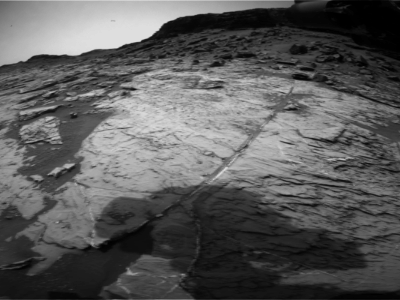

In [ ]:
import io, re, requests
import PIL, PIL.Image, PIL.ImageOps, PIL.ImageEnhance

imgurl = 'https://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01460/opgs/edr/fcam/FRB_527107895EDR_F0572798FHAZ00337M_.jpg'
download = requests.get(imgurl)

img_dir = PIL.Image.open(io.BytesIO(download.content))
img_dir_formatada = img_dir.resize((400,400))
img_dir_final = img_dir_formatada.transform((400,300), PIL.Image.QUAD, data=(0,0,100,400,300,400,400,0), resample=PIL.Image.BILINEAR)

left_url = re.sub('FRB','FLB',imgurl)
img_esq = PIL.Image.open(io.BytesIO(requests.get(re.sub('FRB','FLB',imgurl)).content))
img_esq_formatada = img_esq.resize((400,400))
img_esq_final = img_esq_formatada.transform((400,300), PIL.Image.QUAD, data=(0,0,100,400,300,400,400,0), resample=PIL.Image.BILINEAR)
img_esq_final

img_verm = PIL.ImageOps.colorize(img_dir_final, (0,0,0), (255,0,0))
img_ciano = PIL.ImageOps.colorize(img_dir_final, (0,0,0), (0,255,255))

juncao = PIL.Image.juncao(img_verm,img_ciano,0.5)
brilho = PIL.ImageEnhance.brilho(juncao)
img_3d = brilho.enhance(1.75)
img_3d